In [28]:
library(tidyverse)
library(tidymodels)
library("ggplot2")

# Question 1<br>

## players.csv
There are 7 variables in players dataset. Each row represents a player information. 196 players are recorded in the dataset. <br>
The data is collected from each unique hashed email, record the played hours and personal information of players

1. **experience**:<br>
   character type<br>
   Different game level of the players
2. **subscribe**:<br>Logical type<br>Whether the player have subscribed the game-related newsletter or not
3. **hashedEmail**:<br>character type<br>A private and unique representation of encoding one’s email address using a cryptographic hashing function. Each player in the data set has a unique hashed email.
4. **played_hours**: <br>Numeric type<br>The time the players spent on the game (hours)
5. **name**: <br>character type<br>Name of each player
6. **gender**:<br>character type<br> Gender of players
7. **Age**: <br>Numeric type<br>Age of players (year)


<br><br><br>

# Question 2
My broad research question is to explore What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

The specific question is: Can start_time and end_time predict the time_period?<br><br>

###  Wrangling Data
1. We mutate **experience**, **gender**, and **subscribe** to factor type because they are catagorical variables.
2. We mutate **subscribe** content: "TRUE" to "Yes"; "FALSE" to "No" so it is easier to read and understand.
3. **name** and **hashedEmail** variables are neither numeric nor catagorical variables. We will not need them in prediction problems, so we unselect those columns in the dataframe.
4. Since we only need **played_hours**, **subscribe**, and **Age** to explore our question, we create a new data frame with only these three variables in it.
5. We standardize **played_hours** and **Age** so that all variables will be on a comparable scale.This ensures all data observations will be on a comparable scale and contribute equal shares to the calculation of the distance between points.
6. Then we can use knn-classification to predict the label of **subscribe**.

<br><br><br>
# Question 3 

We load sessions and players dataset using the absolute path and a url format


In [29]:
url_sessions <- "https://raw.githubusercontent.com/Yiliny110/project/refs/heads/main/sessions.csv"
sessions<-read_csv(url_sessions)
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [30]:
url_players<- "https://raw.githubusercontent.com/Yiliny110/project/refs/heads/main/players.csv"
players<-read_csv(url_players)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


<br><br><br><br>We wrangling the data as mentioned in Question 2

In [31]:
# Transfer subscribe, experience, gender into factors

players_data <- players |>
    mutate(
        subscribe = as_factor(subscribe),
        experience = as_factor(experience),
        gender = as_factor(gender)
    ) |>
    mutate(subscribe = fct_recode(subscribe, "Yes" = "TRUE", "No" = "FALSE")) |>
    select(-hashedEmail, -name)
players_data

experience,subscribe,played_hours,gender,Age
<fct>,<fct>,<dbl>,<fct>,<dbl>
Pro,Yes,30.3,Male,9
Veteran,Yes,3.8,Male,17
Veteran,No,0.0,Male,17
Amateur,Yes,0.7,Female,21
Regular,Yes,0.1,Male,21
Amateur,Yes,0.0,Female,17
Regular,Yes,0.0,Female,19
Amateur,No,0.0,Male,21
Amateur,Yes,0.1,Male,47


In [32]:
# 1. Explore the players data

num_obs <- nrow(players)
players_data |>
  group_by(subscribe) |>
  summarize(
    count = n(),
    percentage = round(n() / num_obs * 100, 2)
  )

subscribe,count,percentage
<fct>,<int>,<dbl>
No,52,26.53
Yes,144,73.47


We explore the data by calculating the percentage in each group by dividing the total number of observations and multiplying by 100. We have 144 (73.5%) TRUE and 52 (26.5%) FALSE observations, indicating that our class proportions were roughly preserved when we split the data. <br><br>

In [33]:
# 2. Standardize the data set

set.seed(9999) 
subscribe_recipe <- recipe(subscribe ~ played_hours + Age, data = players_data) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

subscribe_scaled <- subscribe_recipe |>
                    prep() |>
                    bake(players_data)

subscribe_scaled

played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
0.86235447,-1.64271848,Yes
-0.07214775,-0.56012864,Yes
-0.20615184,-0.56012864,No
-0.18146687,-0.01883372,Yes
-0.20262541,-0.01883372,Yes
-0.20615184,-0.56012864,Yes
-0.20615184,-0.28948118,Yes
-0.20615184,-0.01883372,No
-0.20262541,3.49958327,Yes



<br><br><br><br>



 The average played hours is 5.8 hours, and the average age of players is 21 years old.

In [34]:
# Use is.numeric() to select all the numeric variables in players.csv data set and calculate the mean.
# round to 2 decimals

numeric_variable_mean <- players_data |>
  select(where(is.numeric)) |>
  summarize(across(everything(), ~ round(mean(.x, na.rm = TRUE), 2)))

numeric_variable_mean

played_hours,Age
<dbl>,<dbl>
5.85,21.14


<br><br><br><br>
## Plots
<br><br>
### 1. Scatter Plot
<br>
Most of the points are concentrated at the bottom of the graph. For the people who have a high total played hours tend to subscribe a game-related newsletter. Most of unsubscribers are those who spend a short time (below average) on the game.<br><br>Most of the subscribed people are around the average age, while the people that are older have a unsubscribed majority.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


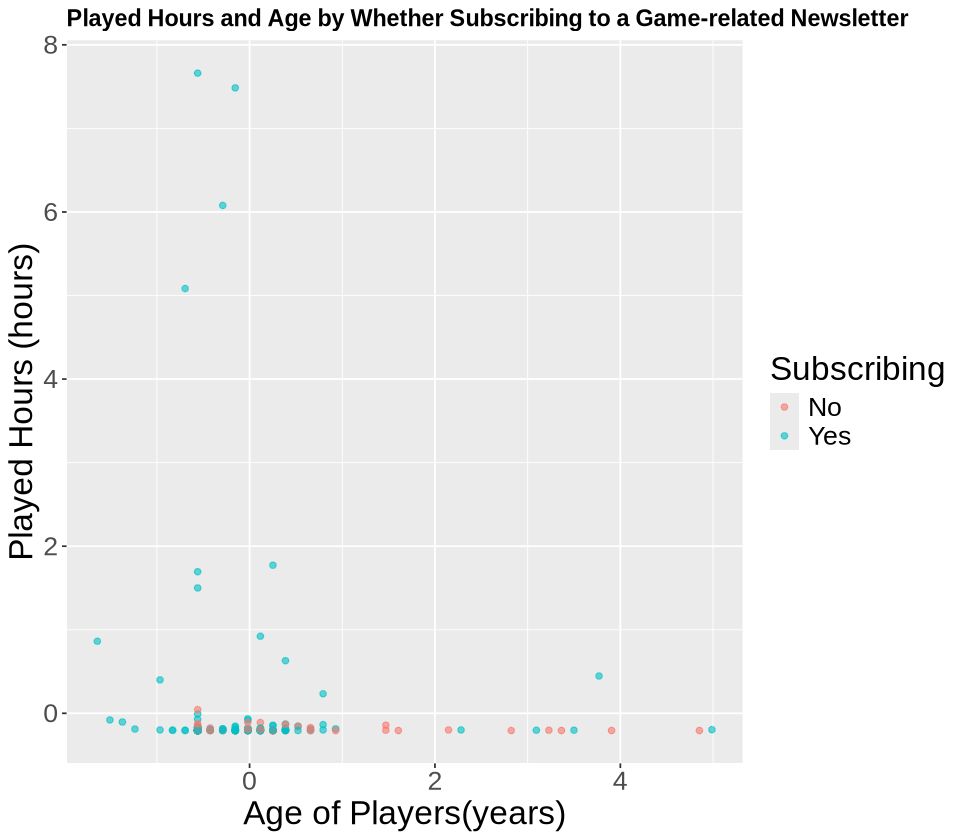

In [35]:
# To predict the class of subscribe, 
# we plot a scatter plot by putting age on the x-axis and played_hours on the y_axis. Color it by subscribe.

options(repr.plot.width = 8, repr.plot.height = 7)

subscribe_plot <- subscribe_scaled |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
        geom_point(alpha = 0.6) +
        labs(x = "Age of Players(years)",
             y = "Played Hours (hours)",
             color = "Subscribing",
             title = "Played Hours and Age by Whether Subscribing to a Game-related Newsletter") +
        theme(
            text = element_text(size = 20),
            plot.title = element_text(size = 14, face = "bold"),
            strip.text = element_text(size = 16, face = "bold")
            )
subscribe_plot

### 2. Histogram Plots
We look at the data seperately using histogram to see the distribution of a single predictor to **subscribe**. <br><br>The maximum people who do not follow the newsletter is about 48 and spend about scaled -0.5 hours on the game.The most people, about 123 people, who subscribe the newsletter also spend about scaled -0.5 hours on the game. Both of the distribution have large population gap between most people played hours and other time.

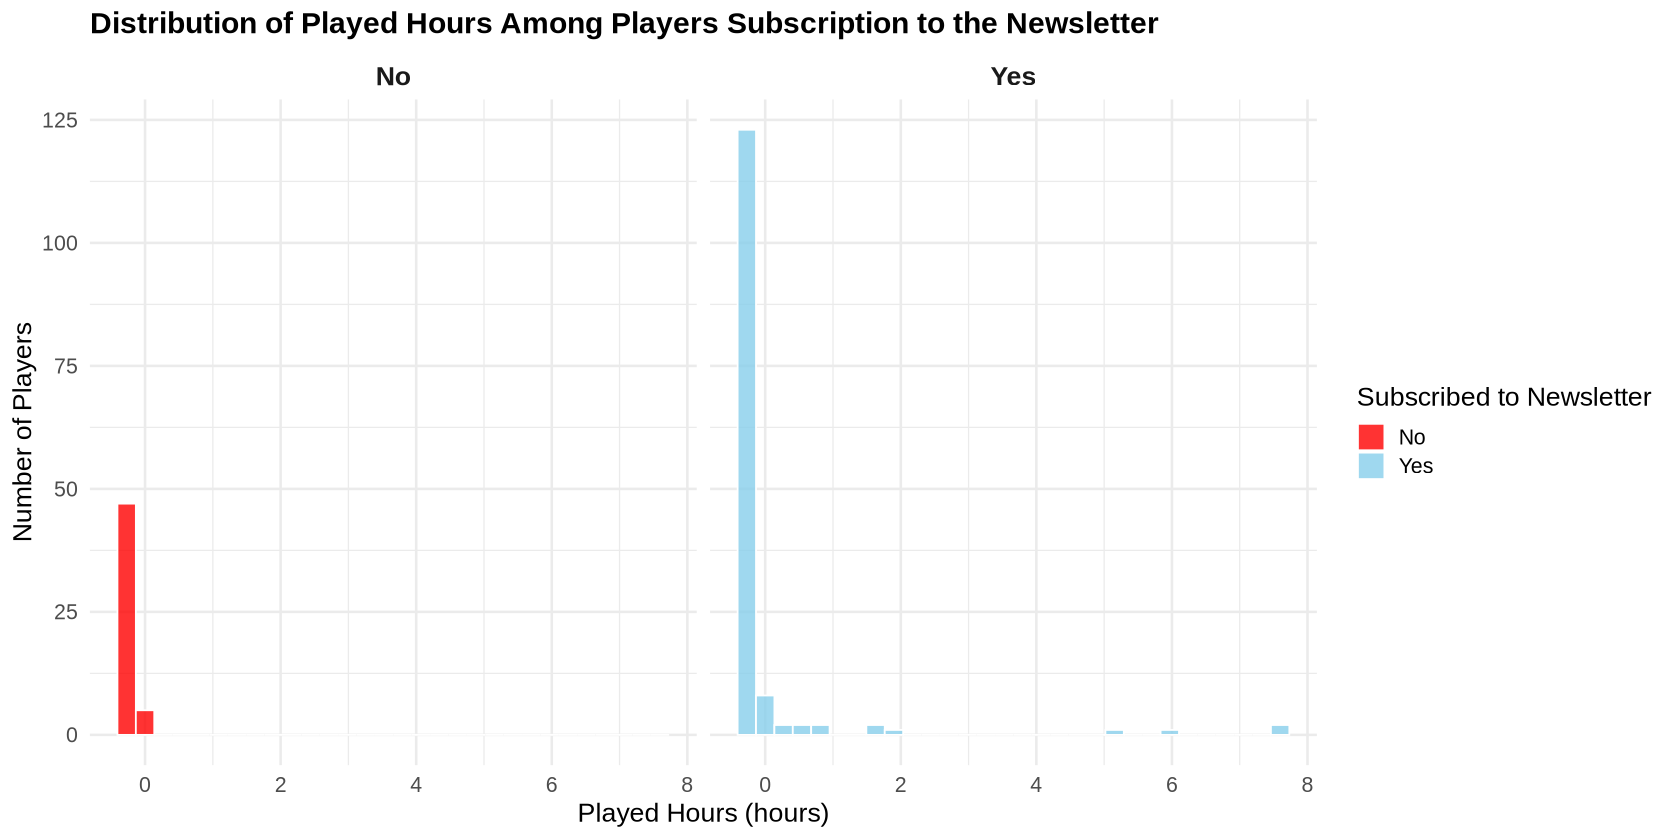

In [36]:

options(repr.plot.width = 14, repr.plot.height = 7)

played_hours_hist <- subscribe_scaled |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
      geom_histogram(bins = 30, alpha = 0.8, color = "white") +
      facet_grid(. ~ subscribe) +
      scale_fill_manual(values = c("No" = "red", "Yes" = "skyblue")) +
      labs(
        title = "Distribution of Played Hours Among Players Subscription to the Newsletter",
        x = "Played Hours (hours)",
        y = "Number of Players",
        fill = "Subscribed to Newsletter"
      ) +
      theme_minimal(base_size = 16) +
      theme(
        plot.title = element_text(size = 18, face = "bold"),
        strip.text = element_text(size = 16, face = "bold")
      )

played_hours_hist

The maximum people who do not follow the newsletter is about 22 at the age of scaled -0.5. The most people, about 58 people, who subscribe the newsletter also at scaled -0.5 years old. Both of the distribution have large population gap between most people age and other ages. Generally, the subscribed population decreases after scaled -0.5 years old.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


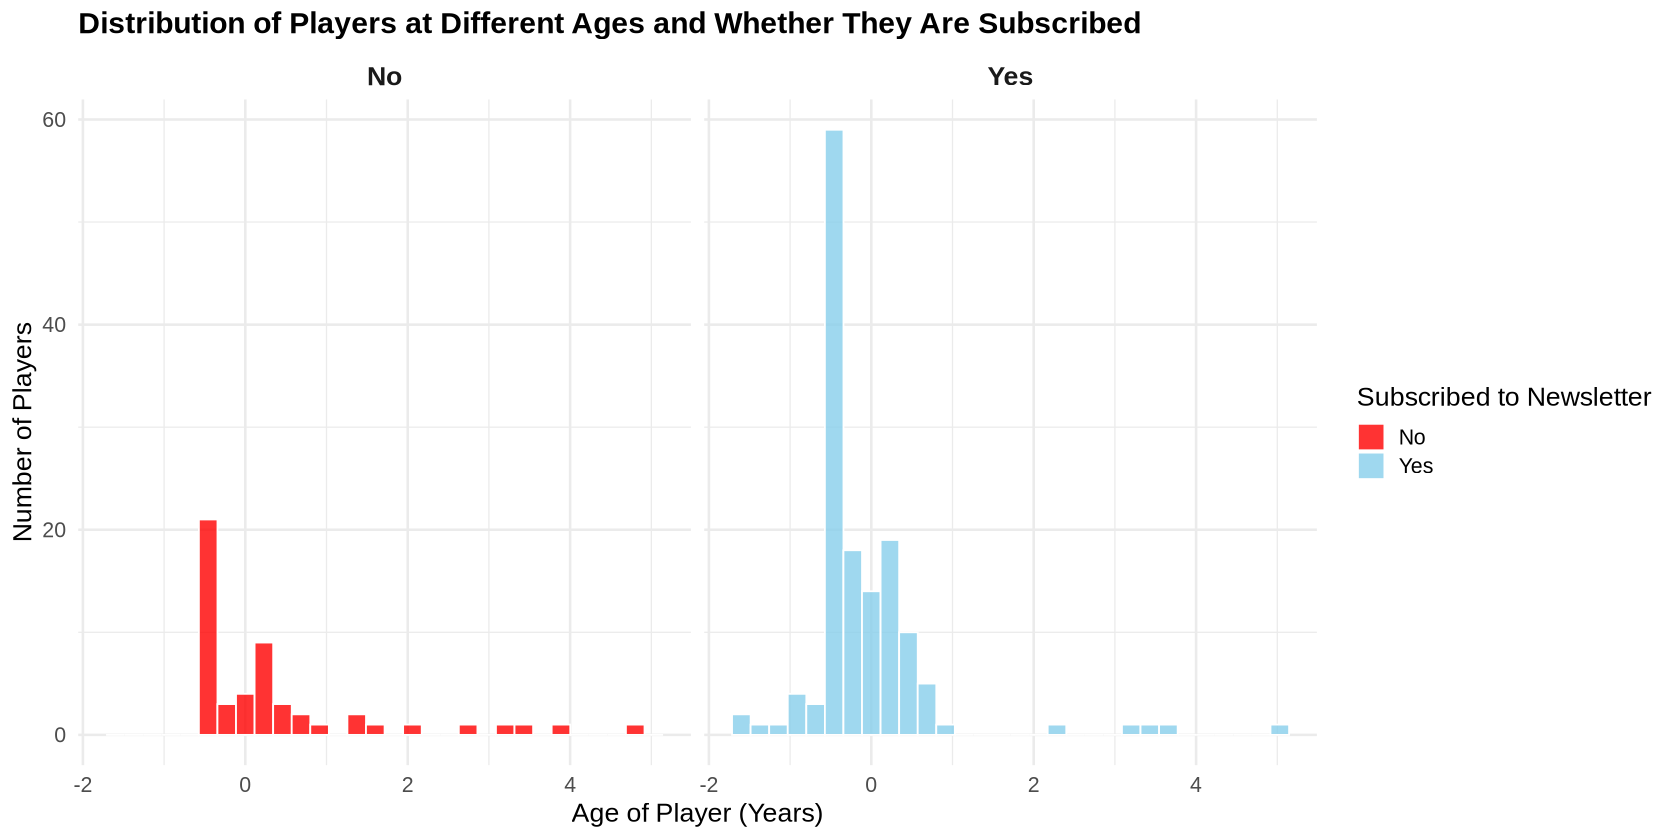

In [37]:
options(repr.plot.width = 14, repr.plot.height = 7)

age_hist <- subscribe_scaled |>
    ggplot(aes(x = Age, fill = subscribe)) +
      geom_histogram(bins = 30, alpha = 0.8, color = "white") +
      facet_grid(. ~ subscribe) +
      scale_fill_manual(values = c("No" = "red", "Yes" = "skyblue")) +
      labs(
        title = "Distribution of Players at Different Ages and Whether They Are Subscribed",
        x = "Age of Player (Years)",
        y = "Number of Players",
        fill = "Subscribed to Newsletter"
      ) +
      theme_minimal(base_size = 16) +
      theme(
        plot.title = element_text(size = 18, face = "bold"),
        strip.text = element_text(size = 16, face = "bold")
      )

age_hist

## Question 4
<br><br>
### 1. K-NN Classification Method and Plan
Using 2 numeric predictors, **Age** and **played_hours**, to predict a catagorical variable is a significant binary k-nn classification problem. It works directly from the data using Euclidean distance without model training, which is a simple, intuitive algorithm The dataset is not very large (only 196 rows), which does not cost much to compute. <br><br>
We split the **subscribe_scaled** dataframe to 70% training data and 30% testing data. Then We split the training data into 5 evenly sized chunks for the validation set to do cross-validation comparison to get the best k value we will use.
### 2. Assumptions
1. To use knn model, we assume the closest neighbor points are likely having the same class.
2. The dataset contains enough observations because knn model needs many points to get the best k value and find neighbors.
3. There is no parametric relationship between whether **Age** and **subscribe** or **played_hours** and **subscribe**. They are relatively random combinations for a player
4. Since the "Yes" represents the majority of **subscribe** in the training data, the majority classifier would always predict that a new observation as "Yes". The estimated accuracy of the majority classifier is usually fairly close to the majority class proportion in the training data. We would suspect that the majority classifier will have an accuracy of around 74%.
### 3. Weakness
1. The **players.csv** is not a large data that has only 196 observations. The knn method might not be accurate with small dataset.
2. There is NA in **Age** of some players, which might cause the prediction not accurate since knn model replace the missing data with the average value of closest neighbor points.